In [1]:
import os

base_dir = os.getcwd()

dataset_path = os.path.join(base_dir, 'datasets')

train_dir = os.path.join(dataset_path, 'train')
val_dir = os.path.join(dataset_path, 'val')

train_0_front_dir = os.path.join(train_dir, '0_front')
train_1_back_dir = os.path.join(train_dir, '1_back')
train_1_front_dir = os.path.join(train_dir, '1_front')
train_2_back_dir = os.path.join(train_dir, '2_back')
train_2_front_dir = os.path.join(train_dir, '2_front')
train_5_front_dir = os.path.join(train_dir, '5_front')
train_ILU_dir = os.path.join(train_dir, 'ILU')

val_0_front_dir = os.path.join(val_dir, '0_front')
val_1_back_dir = os.path.join(val_dir, '1_back')
val_1_front_dir = os.path.join(val_dir, '1_front')
val_2_back_dir = os.path.join(val_dir, '2_back')
val_2_front_dir = os.path.join(val_dir, '2_front')
val_5_front_dir = os.path.join(val_dir, '5_front')
val_ILU_dir = os.path.join(val_dir, 'ILU')

save_dir = os.path.join(base_dir, 'saved_models')

In [2]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

model = tf.keras.models.load_model(os.path.join(save_dir, "hand_sign.h5"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

0


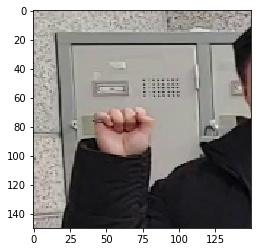

1


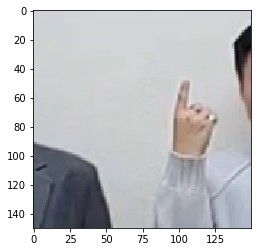

2


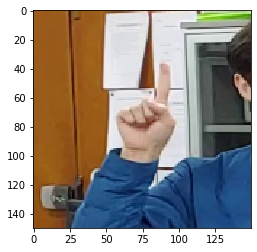

3


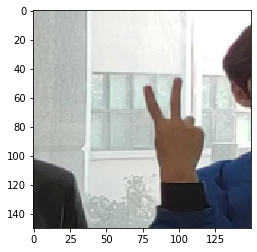

4


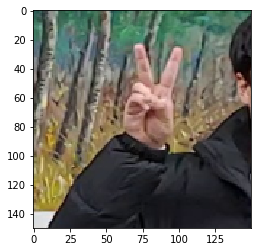

5


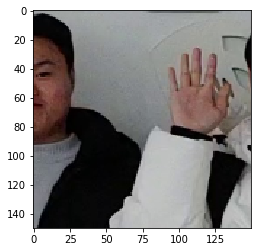

6


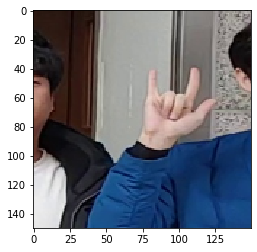

In [3]:
import numpy as np

for class_name in sorted(os.listdir(val_dir)):
    imgs = [os.path.join(val_dir, class_name, img) for img in os.listdir(os.path.join(val_dir, class_name))]
    img_path = imgs[10]
    img = cv2.imread(img_path)
    img = cv2.resize(img, (150, 150))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    input_img = np.expand_dims(img, axis=0)    
    input_img = input_img.astype(np.float32) / 255.
    
    result = model.predict(input_img)
    print(np.argmax(result))
    plt.imshow(img)
    plt.show()    